In [1]:
"""
The following code creates an OLS regression using the statsmodel package from the state economy data generated before

This will allow us to see the impact of minimum wage on gini index relative to other factors and build a model of how
different minimum wages affect income inequality
"""

'\nThe following code creates an OLS regression using the statsmodel package from the state economy data generated before\n\nThis will allow us to see the impact of minimum wage on gini index relative to other factors and build a model of how\ndifferent minimum wages affect income inequality\n'

In [2]:
import pandas as pd

In [3]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [4]:
state_econ = pd.read_csv("../Data/state_econ.csv")

In [5]:
state_econ

,State,Year,gini,min_wage,unemployment,GDP (in millions USD),Population,Residents with Bachelor's Degree or Higher,GDP per Capita,% with College Degree,Union Membership %,Adjusted Household Income,Unadjusted Household Income
0,Alabama,2010,0.4720,7.25,10.375000,175470.1,4785298.0,439863.0,36668.583649,9.191967,10.1,43464.0,47624.0
1,Alaska,2010,0.4220,7.75,8.133333,52947.7,713985.0,83346.0,74158.000518,11.673354,22.9,63648.0,69739.0
2,Arizona,2010,0.4550,7.25,10.300000,248125.3,6413737.0,691889.0,38686.541091,10.787611,6.4,47044.0,51546.0
3,Arkansas,2010,0.4580,6.25,7.858333,100970.8,2921606.0,252888.0,34560.033078,8.655787,4.0,39018.0,42752.0
4,California,2010,0.4710,8.00,12.458333,1973511.9,37349363.0,4610875.0,52839.238517,12.345257,17.5,57020.0,62477.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Virginia,2019,0.4690,7.25,2.758333,556905.2,8535519.0,1312800.0,65245.616582,15.380436,11.2,92610.0,92610.0
496,Washington,2019,0.4577,13.50,4.233333,612996.5,7614893.0,1204728.0,80499.686601,15.820682,4.0,93910.0,93910.0
497,West Virginia,2019,0.4644,8.75,4.933333,78863.9,1792147.0,161686.0,44005.262961,9.021916,10.2,61170.0,61170.0
498,Wisconsin,2019,0.4391,7.25,3.166667,349416.5,5822434.0,829878.0,60012.101468,14.253111,8.1,76720.0,76720.0


In [6]:
state_econ = state_econ.set_index(["State", "Year"])

In [7]:
state_econ

,,gini,min_wage,unemployment,GDP (in millions USD),Population,Residents with Bachelor's Degree or Higher,GDP per Capita,% with College Degree,Union Membership %,Adjusted Household Income,Unadjusted Household Income
State,Year,,,,,,,,,,,
Alabama,2010,0.4720,7.25,10.375000,175470.1,4785298.0,439863.0,36668.583649,9.191967,10.1,43464.0,47624.0
Alaska,2010,0.4220,7.75,8.133333,52947.7,713985.0,83346.0,74158.000518,11.673354,22.9,63648.0,69739.0
Arizona,2010,0.4550,7.25,10.300000,248125.3,6413737.0,691889.0,38686.541091,10.787611,6.4,47044.0,51546.0
Arkansas,2010,0.4580,6.25,7.858333,100970.8,2921606.0,252888.0,34560.033078,8.655787,4.0,39018.0,42752.0
California,2010,0.4710,8.00,12.458333,1973511.9,37349363.0,4610875.0,52839.238517,12.345257,17.5,57020.0,62477.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Virginia,2019,0.4690,7.25,2.758333,556905.2,8535519.0,1312800.0,65245.616582,15.380436,11.2,92610.0,92610.0
Washington,2019,0.4577,13.50,4.233333,612996.5,7614893.0,1204728.0,80499.686601,15.820682,4.0,93910.0,93910.0
West Virginia,2019,0.4644,8.75,4.933333,78863.9,1792147.0,161686.0,44005.262961,9.021916,10.2,61170.0,61170.0


In [8]:
corr_coef = state_econ.corr()
corr_coef

,gini,min_wage,unemployment,GDP (in millions USD),Population,Residents with Bachelor's Degree or Higher,GDP per Capita,% with College Degree,Union Membership %,Adjusted Household Income,Unadjusted Household Income
gini,1.000000,0.127601,0.120652,0.504289,0.506531,0.501150,0.030443,-0.065912,0.020578,-0.167289,-0.212396
min_wage,0.127601,1.000000,-0.176316,0.209803,0.135136,0.190376,0.381032,0.416558,-0.069825,0.477560,0.454285
unemployment,0.120652,-0.176316,1.000000,0.090806,0.180325,0.122991,-0.401189,-0.431640,0.178297,-0.524510,-0.445497
GDP (in millions USD),0.504289,0.209803,0.090806,1.000000,0.973709,0.987217,0.303998,0.171484,0.031207,0.144806,0.141325
Population,0.506531,0.135136,0.180325,0.973709,1.000000,0.989931,0.164326,0.081558,0.039040,0.037505,0.037340
Residents with Bachelor's Degree or Higher,0.501150,0.190376,0.122991,0.987217,0.989931,1.000000,0.247359,0.186776,0.045451,0.126468,0.125813
GDP per Capita,0.030443,0.381032,-0.401189,0.303998,0.164326,0.247359,1.000000,0.624083,-0.038984,0.723492,0.721205
% with College Degree,-0.065912,0.416558,-0.431640,0.171484,0.081558,0.186776,0.624083,1.000000,-0.083877,0.752398,0.764083
Union Membership %,0.020578,-0.069825,0.178297,0.031207,0.039040,0.045451,-0.038984,-0.083877,1.000000,-0.018046,-0.007884
Adjusted Household Income,-0.167289,0.477560,-0.524510,0.144806,0.037505,0.126468,0.723492,0.752398,-0.018046,1.000000,0.989844


In [9]:
#Removed features that are highly colinear with other features and with each other
state_econ = state_econ.drop(["Population", "GDP (in millions USD)", "Unadjusted Household Income"], axis = 1)

In [10]:
econ_train, econ_test, gini_train, gini_test = train_test_split(state_econ[state_econ.columns[1:]], state_econ["gini"],
                                                               test_size = 0.2, random_state = 69)

In [11]:
econ_train

min_wage  unemployment  \
State        Year                           
Colorado     2015      8.23      3.741667   
Nevada       2010      6.55     13.733333   
Kansas       2019      7.25      3.275000   
Oklahoma     2019      2.00      3.133333   
Hawaii       2010      7.25      6.825000   
...                     ...           ...   
South Dakota 2011      7.25      4.600000   
Delaware     2012      7.25      7.066667   
             2019      9.25      3.591667   
Arkansas     2014      6.25      5.900000   
California   2011      8.00     11.891667   

                   Residents with Bachelor's Degree or Higher  GDP per Capita  \
State        Year                                                               
Colorado     2015                                    909032.0    58276.933475   
Nevada       2010                                    256589.0    45718.546114   
Kansas       2019                                    414851.0    60581.557635   
Oklahoma     2019                                    447888.0    51058.271592   
Hawaii       2010                                    184364.0    50058.043987   
...                                                       ...             ...   
South Dakota 2011                                     97956.0    50589.868484   
Delaware     2012                                    111921.0    67459.644180   
             2019                                    134287.0    79159.221331   
Arkansas     2014                                    272411.0    39156.220956   
California   2011                                   4697422.0    54370.730782   

                   % with College Degree  Union Membership %  \
State        Year                                              
Colorado     2015              16.659391                 8.4   
Nevada       2010               9.486986                 9.3   
Kansas       2019              14.239831                 6.3   
Oklahoma     2019              11.318961                11.9   
Hawaii       2010              13.520179                 4.0   
...                                  ...                 ...   
South Dakota 2011              11.886681                 3.4   
Delaware     2012              12.203901                10.4   
             2019              13.790508                 8.7   
Arkansas     2014               9.183315                 4.7   
California   2011              12.462679                17.1   

                   Adjusted Household Income  
State        Year                             
Colorado     2015                    70566.0  
Nevada       2010                    47333.0  
Kansas       2019                    83320.0  
Oklahoma     2019                    67650.0  
Hawaii       2010                    56263.0  
...                                      ...  
South Dakota 2011                    54453.0  
Delaware     2012                    54091.0  
             2019                    84510.0  
Arkansas     2014                    42798.0  
California   2011                    57528.0  

[400 rows x 7 columns]

In [12]:
model = sm.OLS(gini_train, sm.add_constant(econ_train))

In [13]:
results = model.fit()

In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gini   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     29.71
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           7.13e-33
Time:                        15:49:54   Log-Likelihood:                 1087.2
No. Observations:                 400   AIC:                            -2158.
Df Residuals:                     392   BIC:                            -2126.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.4733      0.008     61.299      0.000       0.458       0.488
min_wage                                       0.0024      0.001      3.797      0.000       0.001       0.004
unemployment                                  -0.0009      0.000     -2.027      0.043      -0.002   -2.77e-05
Residents with Bachelor's Degree or Higher  1.081e-08    9.3e-10     11.621      0.000    8.98e-09    1.26e-08
GDP per Capita                              2.069e-07   1.09e-07      1.903      0.058   -6.82e-09    4.21e-07
% with College Degree                         -0.0001      0.001     -0.175      0.861      -0.001       0.001
Union Membership %                          1.117e-05      0.000      0.069      0.945      -0.000       0.000
Adjusted Household Income                  -7.289e-07   1.25e-07     -5.841      0.000   -9.74e-07   -4.84e-07
==============================================================================
Omnibus:                        0.038   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.981   Jarque-Bera (JB):                0.089
Skew:                           0.022   Prob(JB):                        0.957
Kurtosis:                       2.941   Cond. No.                     1.19e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
"""
The following features are being dropped for not meeting the threshold for statistical significance or having a coefficient
that is essentially zero (suggesting the model regards that variable as irrelevant)

Unfortunately, this means our regression only uses 2 of the initial variables to predict gini coefficient
"""

econ_train = econ_train.drop(["unemployment", "GDP per Capita", "Union Membership %",
                              "Residents with Bachelor's Degree or Higher", "Adjusted Household Income"], axis = 1)
econ_test = econ_test.drop(["unemployment", "GDP per Capita", "Union Membership %",
                              "Residents with Bachelor's Degree or Higher", "Adjusted Household Income"], axis = 1)

In [16]:
econ_train

min_wage  % with College Degree
State        Year                                 
Colorado     2015      8.23              16.659391
Nevada       2010      6.55               9.486986
Kansas       2019      7.25              14.239831
Oklahoma     2019      2.00              11.318961
Hawaii       2010      7.25              13.520179
...                     ...                    ...
South Dakota 2011      7.25              11.886681
Delaware     2012      7.25              12.203901
             2019      9.25              13.790508
Arkansas     2014      6.25               9.183315
California   2011      8.00              12.462679

[400 rows x 2 columns]

In [17]:
gini_model = sm.OLS(gini_train, sm.add_constant(econ_train))

In [18]:
results = gini_model.fit()

In [19]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gini   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     5.737
Date:                Sun, 03 Dec 2023   Prob (F-statistic):            0.00350
Time:                        15:49:54   Log-Likelihood:                 1007.8
No. Observations:                 400   AIC:                            -2010.
Df Residuals:                     397   BIC:                            -1998.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4608      0.007     69.956      0.000       0.448       0.474
min_wage                  0.0023      0.001      3.089      0.002       0.001       0.004
% with College Degree    -0.0013      0.001     -2.558      0.011      -0.002      -0.000
==============================================================================
Omnibus:                        0.903   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.637   Jarque-Bera (JB):                0.957
Skew:                          -0.113   Prob(JB):                        0.620
Kurtosis:                       2.918   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
preds = results.predict(sm.add_constant(econ_test))

In [21]:
mse = mean_squared_error(gini_test, preds)

In [22]:
mse

0.0003302094753296045

In [23]:
#low mean squared error might indicate strong fit, but variation in gini coefficient is not considerable

In [24]:
r2 = r2_score(gini_test, preds)

In [25]:
r2

0.05625712131498162

In [26]:
metrics = pd.DataFrame({"Mean-Squared Error": [mse], "R^2 Value": [r2]})
metrics

,Mean-Squared Error,R^2 Value
0,0.00033,0.056257


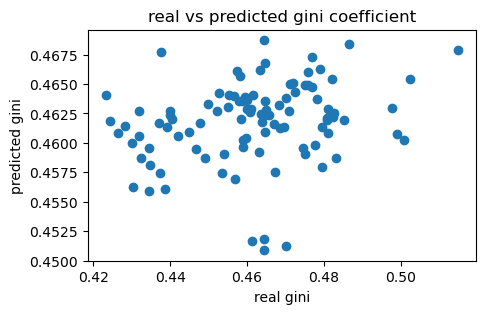

In [31]:
plt.figure(figsize = (5,3))
plt.scatter(gini_test, preds)
plt.xlabel("real gini")
plt.ylabel("predicted gini")
plt.title("real vs predicted gini coefficient")
plt.show()

In [28]:
"""
together, fluctuations in minimum wage and college degree percentage can only predict about 5.6 percent of the variation
in gini coefficient. This suggests that our model is not very predictive and that a more predictive model would likely have
to have a lot more variables
"""

'\ntogether, fluctuations in minimum wage and college degree percentage can only predict about 5.6 percent of the variation\nin gini coefficient. This suggests that our model is not very predictive and that a more predictive model would likely have\nto have a lot more variables\n'